In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('Test3_Full_Original.csv',
            delimiter=',', names=['x', 'y', 'Magicv2', 'localization4', 'localizationlab', 'Magicv2_5g', 'UVIC_Eduroam1', 'UVIC_Eduroam2', 'localization3', 'localization_lab5g', 'localization1', 'localization4_5g', 'UVIC_Eduroam3', 'localization2', 'localization3_5g', 'UVIC_Eduroam4', 'localization1_5g'])
df = df.loc[:,['x','y','Magicv2', 'localization4', 'localizationlab', 'Magicv2_5g', 
       'localization3', 'localization_lab5g', 'localization1', 'localization4_5g', 'localization2',
       'localization3_5g', 'localization1_5g']]

df['Average'] = (df.Magicv2 + df.localization4 + df.localizationlab + df.Magicv2_5g + df.localization3 + df.localization_lab5g + df.localization1 + df.localization4_5g + df.localization2 + df.localization3_5g + df.localization1_5g)/11

In [7]:
X = df.drop('Average', axis = 1)
y = df['Average']

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [8]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [9]:
from pprint import pprint
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [10]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
RandomForestRegModel = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = RandomForestRegModel, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [11]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': False}

In [36]:
RandomForestRegModel = RandomForestRegressor(n_estimators = 600, min_samples_split = 5, min_samples_leaf = 4, max_features = "auto", max_depth = 10, bootstrap = True)
RandomForestRegModel.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=600, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [37]:
y_pred = RandomForestRegModel.predict(x_test)
y_pred

array([-74.43016413, -74.43588211, -74.37795952, -74.1146324 ,
       -74.73180177, -75.77329979, -75.80172989, -75.78055236,
       -75.7805235 , -75.74138594, -75.76491589, -75.7655472 ,
       -75.76481127, -75.78100448, -75.80290632, -75.78125943,
       -75.78383738, -74.77864793, -74.77806923, -74.77806923,
       -74.36481899, -74.76288391, -74.7693502 , -74.76759936,
       -76.16523606, -74.00865346, -73.84868648, -73.84868648,
       -73.82287942, -73.82287942, -74.11867686, -74.11867686,
       -74.11867686, -73.83492094, -73.84475778, -73.84489631,
       -74.88043604, -74.64552743, -74.02514481, -74.02635272,
       -74.02635272, -73.83816001, -73.83816001, -73.83619091,
       -74.04396267, -74.09160637, -74.0258355 , -74.02379005,
       -73.98148315, -73.91293256, -73.93850168, -73.99692781,
       -73.98594235, -74.74334066, -73.77575552, -73.74835341,
       -73.91893679, -73.75075336, -73.79829246, -73.75075336,
       -73.75075336, -73.75345348, -74.01439068, -73.97

In [38]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

1.9413890625537957

In [39]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
496,-74.090909,-74.430164
497,-74.181818,-74.435882
498,-74.090909,-74.377960
499,-74.181818,-74.114632
500,-75.000000,-74.731802
...,...,...
615,-70.363636,-74.044541
616,-70.181818,-74.059307
617,-70.454545,-74.059307
618,-70.363636,-74.059307


In [40]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 1.5749787865863143
Mean Squared Error: 3.7689914922035057
Root Mean Squared Error: 1.9413890625537957


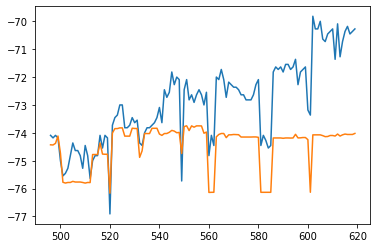

In [41]:
plt.plot(df.Actual.index, df.Actual)
plt.plot(df.Actual.index, df.Predicted)

plt.show()

In [42]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
Fullmodel = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = Fullmodel, param_distributions = random_grid, n_iter = 13, verbose=2,n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:   29.5s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                           

In [43]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

In [81]:
RandomForestRegModel = RandomForestRegressor(n_estimators = 1200, min_samples_split = 2, min_samples_leaf = 5, max_features = "sqrt", max_depth = 100, bootstrap = False)
RandomForestRegModel.fit(X, y)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [82]:
y_pred = RandomForestRegModel.predict(X)
y_pred

array([-65.81100194, -65.26854284, -65.19166988, -65.31546262,
       -65.57551266, -65.12827047, -65.28221282, -65.37261333,
       -65.12536334, -64.9443374 , -66.34192504, -67.02737695,
       -64.78504485, -63.8023097 , -63.81550161, -63.63781267,
       -63.65435272, -63.6528418 , -63.615548  , -63.79501261,
       -67.41375915, -66.76322508, -66.71886269, -67.18841021,
       -67.04612193, -66.6693313 , -66.5538998 , -66.6762125 ,
       -66.41061144, -66.41171896, -66.41510507, -66.39020777,
       -66.73470084, -66.20195435, -66.89357621, -66.6788832 ,
       -66.82989538, -66.9821757 , -66.88294185, -66.99896859,
       -67.77577757, -67.7802881 , -67.75258181, -67.62222601,
       -67.55376617, -67.57038592, -67.26127081, -67.2830831 ,
       -67.25555109, -67.61822025, -69.28497123, -69.27491459,
       -68.79031394, -68.69504312, -69.86913558, -68.94488899,
       -67.81488483, -68.01411207, -67.38658363, -67.61365837,
       -67.8967622 , -67.85889348, -67.99529199, -68.34

In [83]:
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
rmse

0.3677927080123295

In [84]:
df=pd.DataFrame({'Actual':y, 'Predicted':y_pred})
df

,Actual,Predicted
0,-66.181818,-65.811002
1,-65.636364,-65.268543
2,-64.909091,-65.191670
3,-65.272727,-65.315463
4,-65.545455,-65.575513
...,...,...
615,-70.363636,-70.479439
616,-70.181818,-70.531430
617,-70.454545,-70.569525
618,-70.363636,-70.530948


In [85]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))


Mean Absolute Error: 0.23611414455005392
Mean Squared Error: 0.13527147606704265
Root Mean Squared Error: 0.3677927080123295


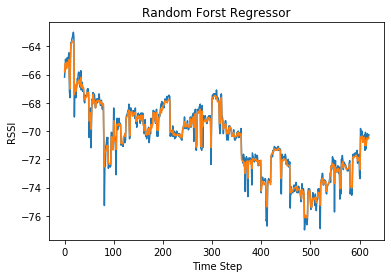

In [87]:
plt.plot(df.Actual.index, df.Actual)
plt.plot(df.Actual.index, df.Predicted)
plt.title('Random Forst Regressor')
plt.xlabel('Time Step')
plt.ylabel('RSSI')
plt.show()